In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
user_data = pd.read_pickle('../../combined_bigquery_processed.pkl')
user_data.head()

,selftext,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,...,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,created_date,post_type
0,"Another one of their smug, preachy ass headlin...",NaN,NaN,NaN,ThisIsTedSpeaking,GA,NaN,1548979405,t5_38unr,t3_alr7qq,...,1552341042,0,0,efhd3oz,The_Donald,NaN,NaN,georgia-us-state,2019-01-31,extant
1,enema has been pretending to be a rapper for y...,NaN,NaN,NaN,mastermeatlock,VA,NaN,1549238712,t5_38unr,t3_amv0ki,...,1553492656,0,0,efownuo,The_Donald,NaN,NaN,virginia,2019-02-03,extant
2,That area from Abilene to border (I-20 to I-10...,NaN,NaN,NaN,txladyvoter,#45,NaN,1549238721,t5_38unr,t3_amr6kj,...,1553492661,0,0,efowo8r,The_Donald,NaN,NaN,MURICA,2019-02-03,extant
3,She's got the politician fist point down,NaN,NaN,NaN,Tdaccount841,SC,NaN,1549152215,t5_38unr,t3_amjtig,...,1553452149,0,0,efmhy5u,The_Donald,NaN,NaN,south-carolina,2019-02-02,extant
4,Imagine getting paid to drop three words on a ...,NaN,NaN,NaN,Ask_If_Im_A_Cactus,Кактус,NaN,1549756908,t5_38unr,t3_aoy05c,...,1553983794,0,0,eg4fg9x,The_Donald,NaN,NaN,ivanka,2019-02-09,extant


Text(0.5, 1.0, 'Number of unique users per day')

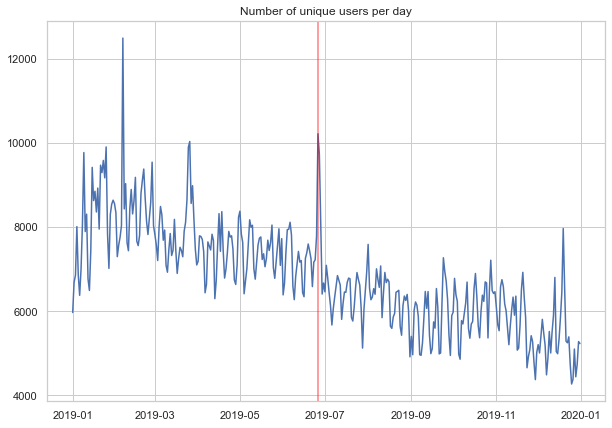

In [102]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 7)})
sns.set_style("whitegrid")
plt.plot(user_data.groupby('date').agg({'author':'nunique'}))
plt.axvline(dt.datetime(2019, 6, 26), color = 'red', alpha=0.5)
plt.title('Number of unique users per day')

In [64]:
user_data['date'] = pd.to_datetime(user_data['created_utc'], unit = 's').dt.date
user_data_1 = user_data[user_data['date'] < dt.date(2019, 6, 26)]
user_data_2 = user_data[user_data['date'] > dt.date(2019, 6, 26)]

In [105]:
min_dates_1 = user_data_1.groupby('author').agg({'date':'min'})
min_dates_2 = user_data_2.groupby('author').agg({'date':'min'})

In [70]:
author_per_day_1 = min_dates_1.reset_index().groupby('date').agg({'author' : 'count'})
author_per_day_2 = min_dates_2.reset_index().groupby('date').agg({'author' : 'count'})

Text(0.5, 1.0, 'Number of newcomers/dormant users per day')

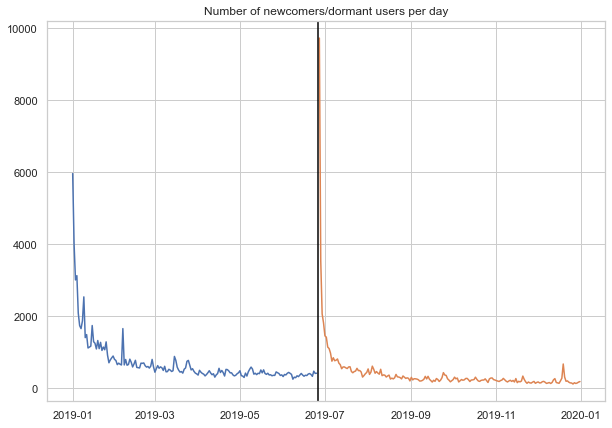

In [104]:
import datetime as dt

plt.plot(author_per_day_1)
plt.plot(author_per_day_2)
plt.axvline(dt.datetime(2019, 6, 26), color = 'black')
plt.title('Number of newcomers/dormant users per day')